## Read Docs: https://github.com/rnelsonchem/pHcalc
<span style="background-color: #FFFF00">pka Acid Dissociation Constants: </span>http://ccc.chem.pitt.edu/wipf/MechOMs/evans_pKa_table.pdf

In [1]:
from pHcalc.pHcalc import Acid, Neutral, System #only x3 classes in .py
import numpy as np
import matplotlib.pyplot as plt 


<span style="background-color: #FFFF00">pH of 0.01 M HCl<br/> x2 ways of achieving same thing; via Neutral class & via Acid class</span>

In [2]:
cl = Neutral(charge=-1, conc=0.01)
system = System(cl)
system.pHsolve()
print(system.pH) 

1.9999977111816385


In [3]:
HCl = Acid(pKa=-8.0, charge=0, conc=0.01)
system = System(HCl)
system.pHsolve()
print(system.pH) 

1.9999977111816385


<span style="background-color: #FFFF00">pH of 0.01 M NaOH<br/>For alkalis only Neutral class method</span>

In [4]:
na = Neutral(charge=1, conc=0.01)
system = System(na)
system.pHsolve()
print(system.pH)

12.000002288818362


<span style="background-color: #FFFF00">pH of 0.01 M HF</span>

In [5]:
HF_pka=3.17
HF_ka=10**(-1*HF_pka)
print('%.2e' %HF_ka)

6.76e-04


In [6]:
hf = Acid(Ka=6.76e-4, charge=0, conc=0.01)
# hf = Acid(pKa=3.17, charge=0, conc=0.01) will also work
system = System(hf)
system.pHsolve()
print(system.pH) 

2.6413261413574203


<span style="background-color: #FFFF00">Distribution diagram H3PO4 from WIKI</span><br/> <img src="https://upload.wikimedia.org/wikipedia/commons/1/16/H3PO4_speciation.png">

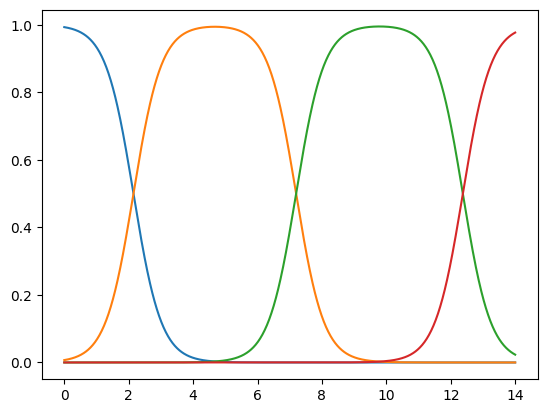

In [7]:
phos = Acid(pKa=[2.148, 7.198, 12.375], charge=0, conc=1.e-3)
phs = np.linspace(0, 14, 1000)
fracs = phos.alpha(phs) # alpha() calculates the fractional distribution of species 
plt.plot(phs, fracs)
plt.show()

<span style="background-color: #FFFF00">These are individual plots of H3PO4, H2PO4-, HPO4_2-, and HPO4_3- <br/> Salts of H2PO−4 may be crystallised from solution by adjustment of pH to about 5.5 and salts of HPO2−4 may be crystallised from solution by adjustment of pH to about 10. The species distribution diagram shows that the concentrations of the two ions are maximum at pH 5.5 and 10</span>

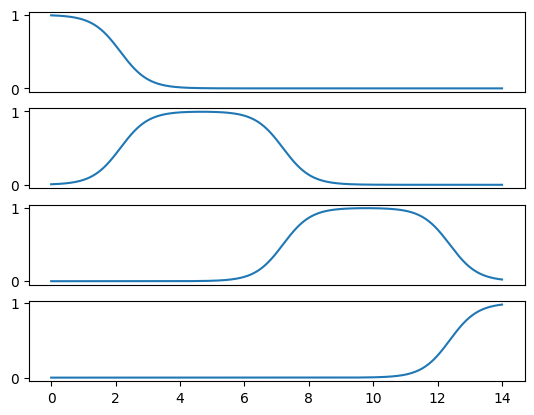

In [8]:
fig, ax = plt.subplots(4,1)
ax[0].plot(phs, fracs[:,0])
ax[0].get_xaxis().set_visible(False)
ax[1].plot(phs, fracs[:,1])
ax[1].get_xaxis().set_visible(False)
ax[2].plot(phs, fracs[:,2])
ax[2].get_xaxis().set_visible(False)
ax[3].plot(phs, fracs[:,3])
plt.show()

<span style="background-color: #FFFF00">Titration Curves H3PO4 with NaOH</span><br/>Detailed description: https://chemistry.stackexchange.com/questions/36915/titration-of-h3po4-with-naoh <br/> <img src="https://www.chem.fsu.edu/chemlab/bluedoor_clip_image012.jpg">

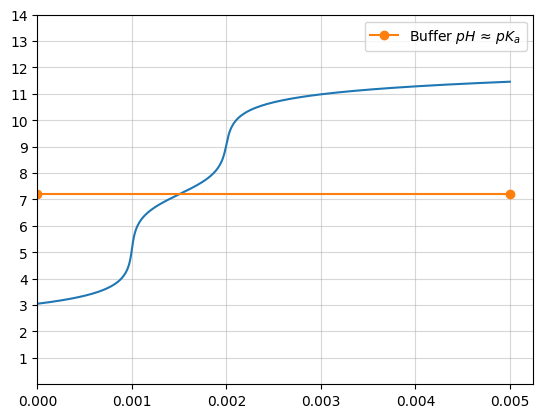

In [9]:
na_moles = np.linspace(1e-8, 5.e-3, 500)
sol_volume = 1. # Liter
phos = Acid(pKa=[2.148, 7.198, 12.375], charge=0, conc=1.e-3)
phs = []
for mol in na_moles:
    na = Neutral(charge=1, conc=mol/sol_volume)
    system = System(phos, na)
    system.pHsolve(guess_est=True)
    phs.append(system.pH)
    
plt.plot(na_moles, phs)
plt.plot([0,5.e-3], [7.198,7.198], marker = 'o', label='Buffer $pH\ ≈\ pK_a$')
plt.ylim(bottom=0) # both axis meet at 0,0
plt.xlim(left=0) # both axis meet at 0,0
plt.legend()
plt.yticks(range(1,15))
plt.grid(alpha=0.5)
plt.show()

## Examples from https://www.chemteam.info/AcidBase/Titration-calc-pH.html

<span style="background-color: #FFFF00">Calculate the pH of the solution that results when 20.0 mL of 0.600 M HCl is reacted with 25.0 mL of 0.600 M NaOH solution</span>

In [10]:
hcl_vol=20.e-3; naoh_vol=25.e-3;
sol_volume = hcl_vol+naoh_vol

hcl_mol=hcl_vol*0.6 # moles=vol*molarity
naoh_mol=naoh_vol*0.6

cl = Neutral(charge=-1, conc=hcl_mol/sol_volume) #Acid class with pka also works
na = Neutral(charge=1, conc=naoh_mol/sol_volume)

system = System(cl,na)
system.pHsolve()
print(system.pH)

12.82390899658203


<span style="background-color: #FFFF00">A 50.0 mL sample of 0.50 M HCl is titrated with 0.50 M NaOH. What is the pH of the solution after 28.0 mL of NaOH have been added to the acid?</span>

In [11]:
hcl_vol=50.e-3; naoh_vol=28.e-3;
sol_volume = hcl_vol+naoh_vol

hcl_mol=hcl_vol*0.5 # moles=vol*molarity
naoh_mol=naoh_vol*0.5

cl = Neutral(charge=-1, conc=hcl_mol/sol_volume) #Acid class with pka also works
na = Neutral(charge=1, conc=naoh_mol/sol_volume)

system = System(cl,na)
system.pHsolve()
print(system.pH)

0.8507003784179663


<span style="background-color: #FFFF00">Consider the titration of 80.0 mL of 0.100 M Ba(OH)2 by 0.400 M HCl. What is the pH of the solution (a) before adding any acid and (b) after adding 20.0 mL of HCl?</span>

In [12]:
hcl_vol=20.e-3; baoh_vol=80.e-3;
sol_volume = hcl_vol+baoh_vol

ba_pure = Neutral(charge=2, conc=0.1)
system = System(ba_pure)
system.pHsolve()
print('Pure Ba(OH)_2 pH:', system.pH)

hcl_mol=hcl_vol*0.4 #moles=vol*molarity
baoh_mol=baoh_vol*0.1

cl = Neutral(charge=-1, conc=hcl_mol/sol_volume) #Acid class with pka also works
ba = Neutral(charge=2, conc=baoh_mol/sol_volume)

system = System(cl,na)
system.pHsolve()
print('Titration b/w Ba(OH)_2 & HCl pH:', system.pH)

Pure Ba(OH)_2 pH: 13.30103073120117
Titration b/w Ba(OH)_2 & HCl pH: 12.99776611328125


<span style="background-color: #FFFF00">Let us suppose we have a solution of a triprotic acid (call its formula H3A) that is strong in all three of its hydrogens. We mix 35.0 mL of 0.0875 M acid solution with 22.0 mL of 0.0585 M Ba(OH)2. What is the pH of the resulting solution?</span>

In [13]:
h3a_vol=35.e-3; baoh_vol=22.e-3;
sol_volume = h3a_vol+baoh_vol

h3a_mol=h3a_vol*0.0875 #moles=vol*molarity
baoh_mol=baoh_vol*0.0585

a3 = Neutral(charge=-3, conc=h3a_mol/sol_volume) #Acid class cannot be used pka unknown
ba = Neutral(charge=2, conc=baoh_mol/sol_volume)

system = System(a3,ba)
system.pHsolve()
print('Titration b/w Ba(OH)_2 & H3A pH:', system.pH)

Titration b/w Ba(OH)_2 & H3A pH: 0.9354446411132789


# pH including solids & saturation
<span style="background-color: #FFFF00">For known Solubility Product Constant, Ksp; what is the maximum pH that can be established in solid / aqueous $Ca(OH)^{2}$ (Ksp = 5.5e-6)</span> <br/> ${aA(s) \rightleftharpoons  cC(aq) + dD(aq)} \nonumber$ <br/> $K_{sp} = [C]^c [D]^d \nonumber$ <br/><br/> For $Ca(OH)^{2}$ $K_{sp} = [Ca^{2+}][OH^-]^2\nonumber$

In [14]:
import sympy as sm
s=sm.symbols('s')
ksp = 5.5e-6
eq= sm.Eq(ksp, (s)*(2*s)**2) #RHS & LHS of equation
display(eq)
sol=sm.solve(eq, dict=True)[0]
print('OH molarity s:',sol[s])

Eq(5.5e-6, 4*s**3)

OH molarity s: 0.0111199004528466


In [15]:
ca = Neutral(charge=2, conc=float(sol[s]))  #convert to float bcz sol is sympy obj
system = System(ca)
system.pHsolve()
print(system.pH) 

12.34712905883789


# Industrial HCl furnace
<sup> http://www.graphitequip.com/hcl-synthesis-furnace.htm</sup><br/>
<span style="background-color: #FFFF00">HCl furnace produces 37% HCl by weight having $ρ=1.18g/mL$. Part of the acid (about 500L) is in excess & has to be neutralised in a pit. How much NaOH 20% by weight having $ρ=1.22g/mL$ is required to achieve resultant pH of 8 before pit is drained?</span>

In [16]:
hcl_vol=500.; hcl_wt=0.37; hcl_rho=1.18; 
pH_target=8.0; naoh_wt=0.20;
hcl_mw=36.5; naoh_mw=40.; naoh_rho=1.22;

# Calculate HCl molarity from w.t%; assume 1L of HCl
hcl_mass=(1000*1)*hcl_rho
hcl_molrty=(hcl_wt*hcl_mass) / (1*hcl_mw)
print("HCl molarity (M):",hcl_molrty, sep="")

# Calculate NaOH molarity from w.t%; assume 1L of NaOH
naoh_mass=(1000*1)*naoh_rho
naoh_molrty=(naoh_wt*naoh_mass) / (1*naoh_mw)
print("NaOH molarity (M):",naoh_molrty, sep="")

HCl molarity (M):11.961643835616439
NaOH molarity (M):6.1


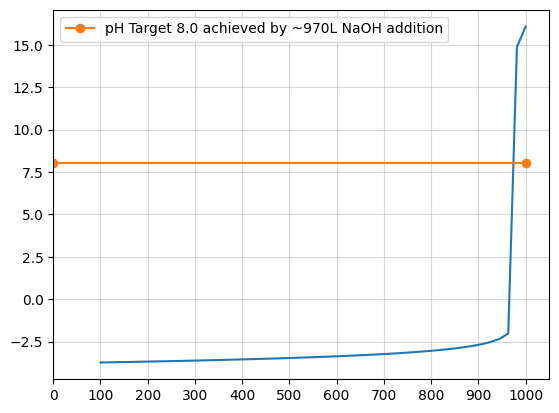

In [17]:
#Multiplier of argument conc= represent volume units of respective molarity
HCl = Acid(pKa=-8.0, charge=0, conc=hcl_vol*hcl_molrty)
x=[]
j=np.linspace(100,1000) #arbitrary range for NaOH volume units but must not start with 0

for i in j: 
    na = Neutral(charge=1, conc=i*naoh_molrty) #iterate through NaOH volume units
    system = System(HCl,na)
    system.pHsolve()
    x.append(system.pH)

plt.plot(j, x)
plt.plot([0,1000], [8,8], marker = 'o', label='pH Target 8.0 achieved by ~970L NaOH addition')
plt.xlim(left=0) 
plt.xticks(range(0,1000+1,100))
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [18]:
#more accurate algorithm to identify exact NaOH volume
HCl = Acid(pKa=-8.0, charge=0, conc=hcl_vol*hcl_molrty)

i=100 #initial guess NaOH vol
while True:
    i+=1 #accuracy upto 1L of NaOH
    na = Neutral(charge=1, conc=i*naoh_molrty) #iterate through NaOH volume units
    system = System(HCl,na)
    system.pHsolve()
    x=system.pH
    if x>pH_target:
        break

print(f'NaOH (L): {i} | pH: {x}')

NaOH (L): 981 | pH: 14.515621948242186


<span style="background-color: #FFFF00">Lets check results analytically bcz HCl & NaOH react 1:1 stoichiometric ratio</span>

In [19]:
naoh_molesT = hcl_molesT = hcl_vol*hcl_molrty #at ph=7 equal moles
naoh_volT=naoh_molesT/naoh_molrty
print(f'NaOH (L): {naoh_volT}') 


NaOH (L): 980.4626094767573


In [20]:
%reload_ext version_information
%version_information sympy, numpy, pHcalc 

Software versions
Python 3.9.13 64bit [Clang 12.0.9 (https://android.googlesource.com/toolchain/llvm-project c935d99d]
IPython 8.4.0
OS Linux 4.19.113 24856341 aarch64 with libc
sympy 1.11.1
numpy 1.20.3
pHcalc 0.1.2
Sun Oct 30 14:34:13 2022 PKT